In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
import seaborn as sns


2022-06-18 20:05:25.302491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path="/Users/joannaborowa/Desktop/archive 3/sign_mnist_train.csv"
train = pd.read_csv(file_path)

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
file_path="/Users/joannaborowa/Desktop/archive 3/sign_mnist_test.csv"
test = pd.read_csv(file_path)

In [5]:
labels=train['label'].values

In [6]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

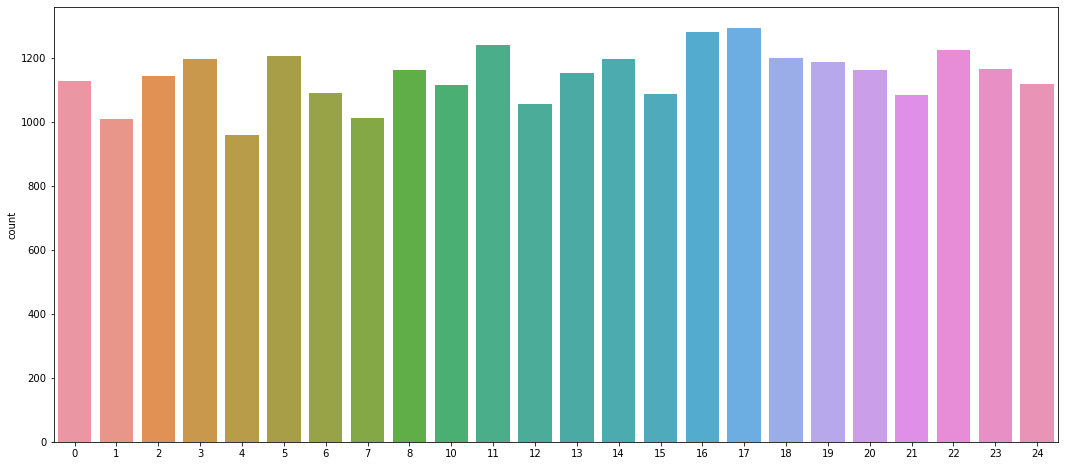

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis=1, inplace=True)

In [9]:
images=train.values
images=np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten()for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
index = 2
print(labels[index])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


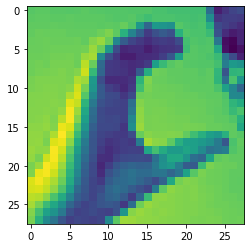

In [13]:
plt.imshow(images[index].reshape(28,28))

In [14]:
import cv2

In [15]:
x_train, x_test, y_train, y_test=train_test_split(images, labels, test_size=0.3, random_state=44)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size =128
num_classes = 24
epochs =10

In [17]:
x_train=x_train/255
x_test=x_test/255

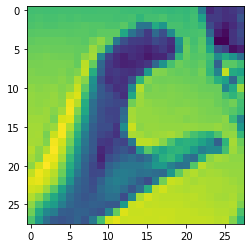

In [18]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [19]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2,)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2,)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2,)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

2022-06-18 20:05:43.274745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [22]:
history=model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 30s 193ms/step - loss: 2.6353 - accuracy: 0.1991 - val_loss: 1.6329 - val_accuracy: 0.4947
Epoch 2/10
151/151 [==============================] - 36s 241ms/step - loss: 1.2360 - accuracy: 0.5882 - val_loss: 0.8044 - val_accuracy: 0.7470
Epoch 3/10
151/151 [==============================] - 37s 245ms/step - loss: 0.7458 - accuracy: 0.7496 - val_loss: 0.4890 - val_accuracy: 0.8498
Epoch 4/10
151/151 [==============================] - 38s 252ms/step - loss: 0.5158 - accuracy: 0.8251 - val_loss: 0.3086 - val_accuracy: 0.9034
Epoch 5/10
151/151 [==============================] - 38s 253ms/step - loss: 0.3551 - accuracy: 0.8812 - val_loss: 0.2223 - val_accuracy: 0.9287
Epoch 6/10
151/151 [==============================] - 45s 296ms/step - loss: 0.2535 - accuracy: 0.9156 - val_loss: 0.1440 - val_accuracy: 0.9609
Epoch 7/10
151/151 [==============================] - 45s 302ms/step - loss: 0.1812 - accuracy: 0.9426 - val_loss: 0.0848 - val_ac

In [23]:
model.save('sing_mnist_cnn_50_Epochs.h5')

In [24]:
test_labels=test['label']
test.drop('label', axis=1, inplace=True)

test_images=test.values
test_images=np.array([np.reshape(i,(28,28))for i in test_images])
test_images=np.array([i.flatten()for i in test_images])
test_labels=label_binrizer.fit_transform(test_labels)

test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred=model.predict(test_images)

225/225 [==============================] - 3s 14ms/step


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(test_labels, y_pred.round())

0.8151143335192415